# Modeling Interest Rates

![interest rate model](./images/rate_model_1.png)


![interest rate model](./images/rate_model_2.png)

## Orestein-Uhlenbeck Process

![interest rate model](./images/rate_model_3.png)

![interest rate model](./images/rate_model_4.png)




![interest rate model](./images/rate_model_6.png)

![interest rate model](./images/rate_model_7.png)

![interest rate model](./images/rate_model_8.png)



![interest rate model](./images/rate_model_10.png)

![interest rate model](./images/rate_model_11.png)

![interest rate model](./images/rate_model_12.png)

![interest rate model](./images/rate_model_13.png)

In [193]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr
import pandas as pd

# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

In [194]:
sample_size = 10000
standard_deviation =0.1
rate_of_mean_reversion = 1.2
mean_equilibrum_value = 0.5

def generate_process(dt=0.1, theta=1.2, mu=0.5, sigma=0.3, n=10000):
    
    # Generate inital values
    # x(t = 0) = 0 and initialize x(t) with zeros
    # x is the time series
    x = np.zeros(n)
    
    # iterate over t
    for t in range(1,n):
        """
        Normal Gaussian Distribution Function
        numpy.random.normal(loc=0.0, scale=1.0, size=None)

        Parameters
        loc: float or array_like of floats
        Mean (“centre”) of the distribution.

        scale: float or array_like of floats
        Standard deviation (spread or “width”) of the distribution. Must be non-negative.

        size: int or tuple of ints, optional
        Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. 
        If size is None (default), a single value is returned if loc and scale are both scalars. 
        Otherwise, np.broadcast(loc, scale).size samples are drawn.

        """
        # w(t+dt) - W(t) ~ N(0,dt)
        # recall that W(t) had independent increments: future W(t + dt) - W(t) increments are independent of past values
        # W(t) has Gaussian increments: W(t+dt) - W(t) and is normally distributed with mean of 0 and variance
        # this process is stationary while brownian motion is not 
        # x[t] is the change in the time series
        # mu is the equilibrum or the mean value
        # theta is the rate by which the process reverts towards the mean
        # sigma is the degree of volatility around the mu, or the mean
        # value is dependent on the previous result, making it a markov chain
        # this is both a markov and gausian process
        # dW(t) can be replaced with normal distribution
        x[t] = x[t-1] + theta * ( mu - x[t-1])*dt + sigma * npr.normal(0, np.sqrt(dt))
        
    return x
    
    

In [195]:

def plot_process(x):
    plt.plot(x)
    plt.xlabel('Time (t)')
    plt.ylabel('x(t)')
    plt.title('Ornstein-Uhlenbeck Process')
    plt.figure(figsize=(15,4))
    plt.show();


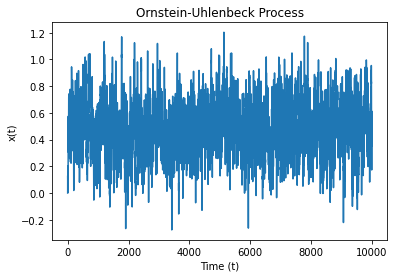

<Figure size 1080x288 with 0 Axes>

In [196]:
x = generate_process()
plot_process(x)

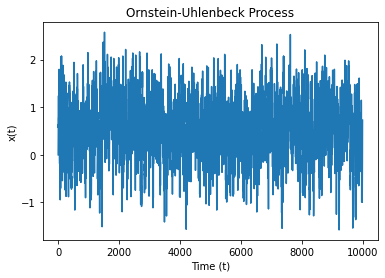

<Figure size 1080x288 with 0 Axes>

In [197]:
x = generate_process(sigma=0.9)
plot_process(x)

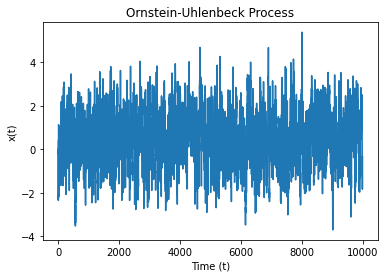

<Figure size 1080x288 with 0 Axes>

In [198]:
x = generate_process(sigma=1.8)
plot_process(x)

# Vasicek Model

![vasicek](./images/rate_model_14.png)

![vasicek](./images/rate_model_15.png)

![vasicek](./images/rate_model_16.png)

![vasicek](./images/rate_model_17.png)

![vasicek](./images/rate_model_18.png)

![vasicek](./images/rate_model_19.png)

Kappa is the speed of mean reversion 
- a low values means the retun to the mean is low and vica versa

In [199]:
initial_value_interest_rate = 0
rate_of_mean_reversion = 0
mean_value_interest_rate = 0
random_noise_standard_deviation = 0

def vasicek_model(r0, kappa, theta, sigma, T=1., N=1000):
    
    # calculate the size of each step
    dt = T / float(N)
    
    # time steps
    t = np.linspace(0, T, N+1)
    
    # interest rates
    rates = [r0]
    
    for i in range(N):
        dr = kappa * (theta - rates[-1])*dt + sigma * np.sqrt(dt) * np.random.normal()
        rates.append(rates[-1]+dr)
        
    return t, rates
    

In [200]:

def plot_vasicek(t,r):
    plt.plot(t,r)
    plt.xlabel('Time (t)')
    plt.ylabel('Interest rate r(t)')
    plt.title('Vasicek Model')
    plt.show();


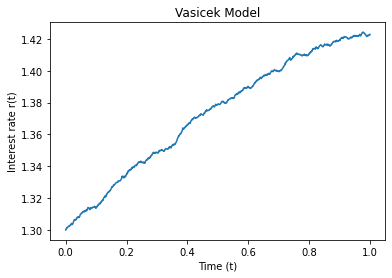

In [201]:
r0 = 1.3
kappa = 0.9
theta = 1.5
sigma = 0.01
t, rates = vasicek_model(r0,kappa,theta,sigma)
plot_vasicek(t,rates)

In [202]:

def plot_high_vol(t,r):
    plt.plot(t,r)
    plt.xlabel('Time Over 1 Year (t)')
    plt.ylabel('APR r(t)')
    plt.ylim(0,20)
    plt.title('Vasicek Model Staking Model')
    plt.show();

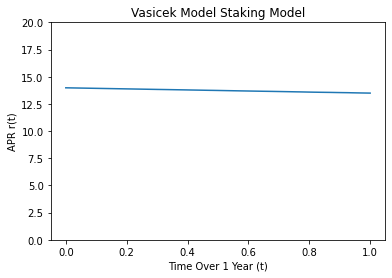

In [220]:
# Vasicek Interest Rate Model 
# Built Using Ornstein-Uhlenbeck Process
# Gausian & Markov Process
#Wiener process is a Risk Neutral Framework where investor decisions do not account for risk
r0 = 13.98 # ( ( 13.98 / 100 ) / 365) # initial rate based on todays APR on per day basis
kappa = 0.05  # assume slow velocity for apr movements, if kappa is small assume a very slow reversion to the man
# long term mean , in the long run most staking will decay to 4%
theta = 4.0 #( ( 4.0 / 100 ) / 365)
sigma_volatility_of_interest_rate = 0.001 # assume crazy high volatilty in the system
t, rates = vasicek_model(r0,kappa,theta,sigma,T=1,N=10000)
plot_high_vol(t,rates)

# Bond Pricing With Vasicek Model

![vasicek](./images/rate_model_20.png)

**interest rate has a huge impact on the price of the bond**

![vasicek](./images/rate_model_21.png)


In [241]:

# we will simulate 1000 r(t) interest rate process
NUM_OF_SIMULATIONS = 1000

# there are the number of points in a single r(t) process
NUM_OF_POINTS = 200

def monte_carlo_vesicek_model(x, r0, kappa, theta, sigma, T=1.):
    
    # calculate the time increment    
    dt = T / float(NUM_OF_POINTS)
    
    # create list data structure to store simulations, store the interest rate
    result = []    
    """
    [
        [ 0.2, 0.21, .... ],
        [ 0.3, 0.31, .... ],
        [ 0.4, 0.41, .... ]
    ]
    """
    
    for i in range(NUM_OF_SIMULATIONS):
        rates = [r0]
        
        for j in range(NUM_OF_POINTS):
            
            dr = kappa * (theta-rates[-1])*dt + sigma * np.sqrt(dt)* np.random.normal()
            
            rates.append(rates[-1] + dr)
            
        result.append(rates)
        
    simulation_data = pd.DataFrame(result)
    
    
    # calculate the integral of the r(t) based on the simulated paths
    integral_sum = simulation_data.sum() * dt
    present_integral_sum = np.exp(-integral_sum)
    
    # mean beacasuse the integral is the average
    bond_price = x * np.mean(present_integral_sum)
    
    
    
    return simulation_data, round(bond_price,2)

    
    

In [242]:
principal_amount_usd = 100000
initial_interest_rate = 0.1
velocity_of_interest_rate_change = 0.3
long_term_mean_interest_rate = 0.1
volatility_in_the_system = 0.03

sd, bond_price = monte_carlo_vesicek_model(principal_amount_usd, initial_interest_rate, velocity_of_interest_rate_change, long_term_mean_interest_rate,volatility_in_the_system)

In [243]:
sd.head()

0         1         2         3         4         5         6         7    \
0  0.1  0.097269  0.095119  0.093485  0.092049  0.094242  0.096822  0.095558   
1  0.1  0.101070  0.097672  0.096315  0.099110  0.095691  0.094989  0.093056   
2  0.1  0.102286  0.100613  0.101161  0.101512  0.103548  0.100532  0.099406   
3  0.1  0.100329  0.098293  0.096368  0.097052  0.100806  0.101828  0.104787   
4  0.1  0.097826  0.099948  0.100248  0.099591  0.097583  0.098810  0.100998   

        8         9    ...       191       192       193       194       195  \
0  0.094543  0.092441  ...  0.066515  0.067067  0.068296  0.065674  0.065170   
1  0.092816  0.090575  ...  0.078837  0.077307  0.079905  0.077810  0.078999   
2  0.098805  0.100796  ...  0.099783  0.098069  0.100148  0.100871  0.102714   
3  0.108529  0.105805  ...  0.088703  0.086149  0.082265  0.078736  0.078671   
4  0.100952  0.105371  ...  0.097331  0.096787  0.096811  0.099909  0.099745   

        196       197       198       199       200  
0  0.062707  0.064258  0.060840  0.066773  0.068556  
1  0.077442  0.076486  0.077267  0.078836  0.077909  
2  0.103072  0.105888  0.104141  0.104139  0.102984  
3  0.077751  0.072865  0.072962  0.070473  0.071476  
4  0.100545  0.098717  0.097324  0.096072  0.096626  

[5 rows x 201 columns]

In [244]:
sd.tail()

0         1         2         3         4         5         6    \
995  0.1  0.100401  0.102393  0.101804  0.100792  0.100293  0.100359   
996  0.1  0.098577  0.098000  0.097350  0.098628  0.102525  0.104518   
997  0.1  0.102475  0.103366  0.099333  0.101403  0.098331  0.101183   
998  0.1  0.099129  0.102362  0.104490  0.103817  0.101800  0.103063   
999  0.1  0.101899  0.100608  0.098738  0.098571  0.098952  0.098598   

          7         8         9    ...       191       192       193  \
995  0.099401  0.100198  0.102173  ...  0.081637  0.083406  0.079818   
996  0.105350  0.108620  0.106808  ...  0.101489  0.104754  0.100347   
997  0.101386  0.100579  0.104830  ...  0.080293  0.075810  0.075100   
998  0.102707  0.102660  0.102632  ...  0.116155  0.115605  0.114659   
999  0.095373  0.094078  0.096136  ...  0.111843  0.112551  0.111036   

          194       195       196       197       198       199       200  
995  0.081171  0.080214  0.078362  0.080036  0.077132  0.073431  0.072282  
996  0.103487  0.098626  0.098392  0.097516  0.097673  0.097570  0.099414  
997  0.077358  0.074881  0.077512  0.082428  0.080912  0.080386  0.080033  
998  0.113610  0.117167  0.116874  0.113605  0.112848  0.111311  0.107647  
999  0.111972  0.115055  0.111574  0.114973  0.119550  0.118720  0.120190  

[5 rows x 201 columns]

In [245]:
bond_price

60739.57

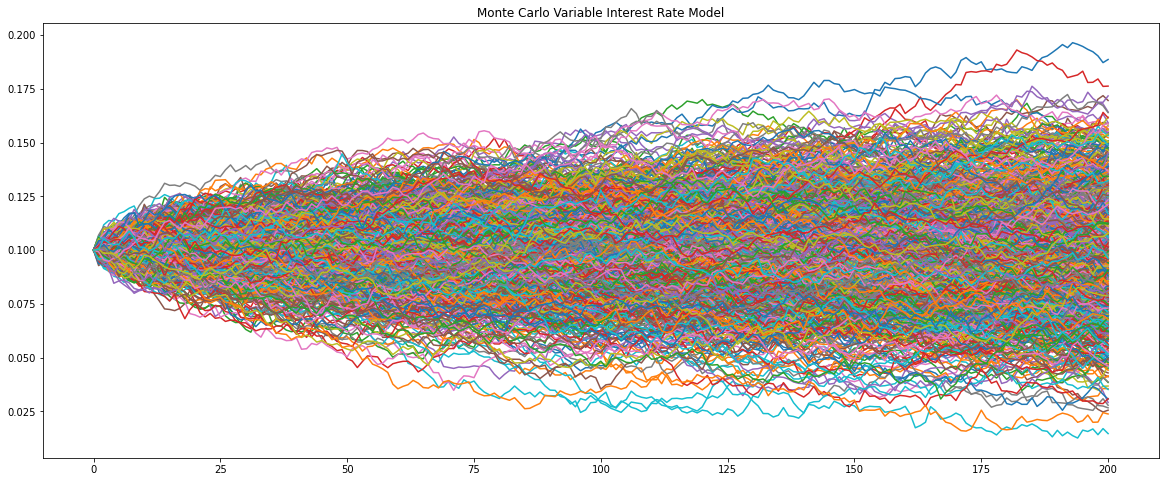

In [230]:
sd.T.plot(figsize=(20,8), legend=False,title='Monte Carlo Variable Interest Rate Model')

51088.93

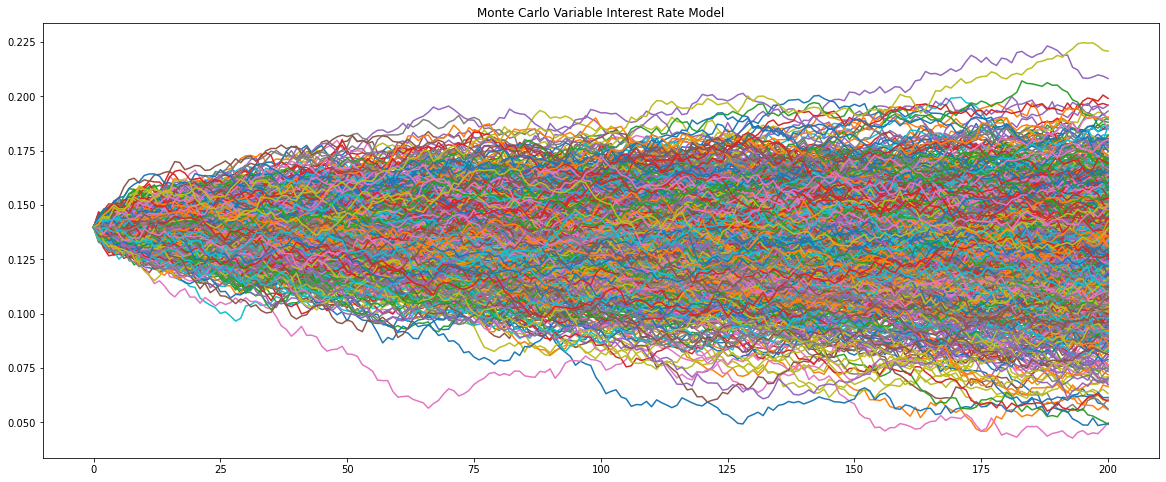

In [246]:
principal_amount_usd = 100000
initial_interest_rate = 0.1398
velocity_of_interest_rate_change = 0.3
long_term_mean_interest_rate = 0.1
volatility_in_the_system = 0.03

sd, bond_price = monte_carlo_vesicek_model(principal_amount_usd, initial_interest_rate, velocity_of_interest_rate_change, long_term_mean_interest_rate,volatility_in_the_system)
sd.T.plot(figsize=(20,8), legend=False,title='Monte Carlo Variable Interest Rate Model')
bond_price

53319.59

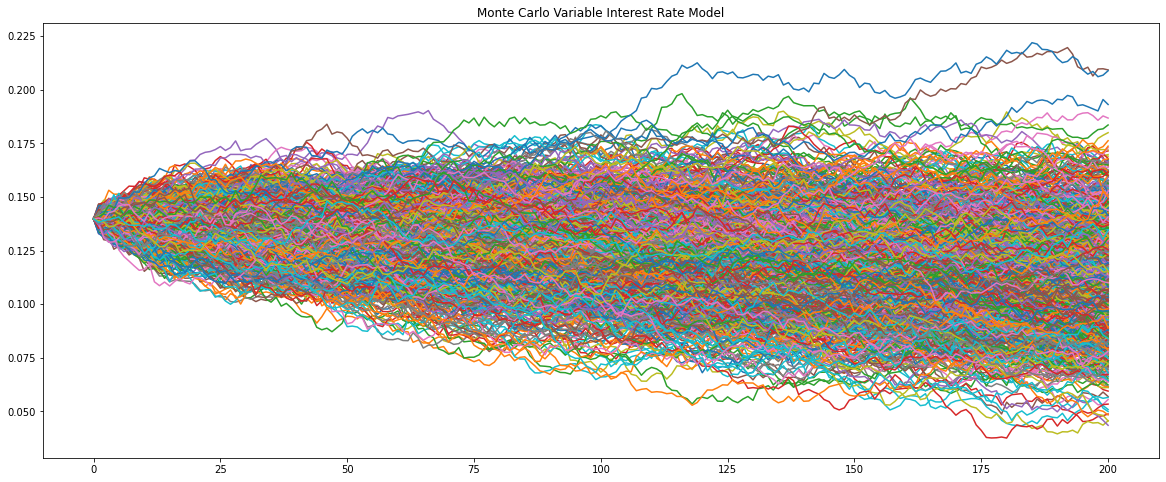

In [247]:
principal_amount_usd = 100000
initial_interest_rate = 0.1398
velocity_of_interest_rate_change = 0.3
long_term_mean_interest_rate = 0.04
volatility_in_the_system = 0.03

sd, bond_price = monte_carlo_vesicek_model(principal_amount_usd, initial_interest_rate, velocity_of_interest_rate_change, long_term_mean_interest_rate,volatility_in_the_system)
sd.T.plot(figsize=(20,8), legend=False,title='Monte Carlo Variable Interest Rate Model')
bond_price

Text(0, 0.5, 'Time Period In Days (365 Days)')

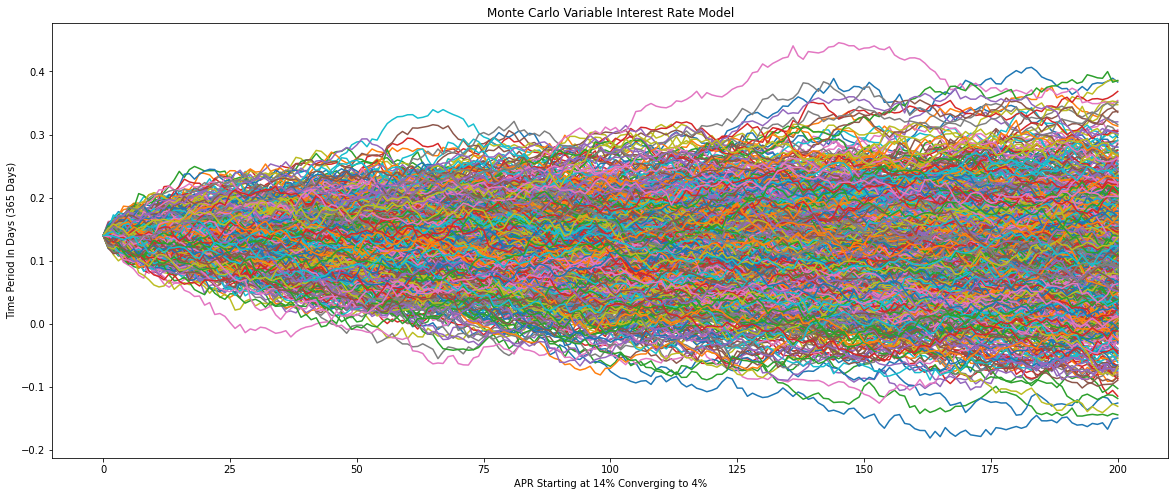

In [248]:
principal_amount_usd = 1000000
initial_interest_rate = 0.1400
velocity_of_interest_rate_change = 0.3
long_term_mean_interest_rate = 0.04
volatility_in_the_system = 0.1

sd, bond_price = monte_carlo_vesicek_model(principal_amount_usd, initial_interest_rate, velocity_of_interest_rate_change, long_term_mean_interest_rate,volatility_in_the_system)
ax = sd.T.plot(figsize=(20,8), legend=False,title='Monte Carlo Variable Interest Rate Model')
ax.set_xlabel("APR Starting at 14% Converging to 4%")
ax.set_ylabel("Time Period In Days (365 Days)")

# Cox Ingersoll Ross Model

In [251]:
initial_value_interest_rate = 0
rate_of_mean_reversion = 0
mean_value_interest_rate = 0
random_noise_standard_deviation = 0

def cox_ingersoll_ross_model(r0, kappa, theta, sigma, T=1., N=1000):
    
    # calculate the size of each step
    dt = T / float(N)
    
    # time steps
    t = np.linspace(0, T, N+1)
    
    # interest rates
    rates = [r0]
    
    for i in range(N):
        dr = kappa * (theta - rates[-1])*dt + sigma *np.sqrt(rates[-1]) * np.sqrt(dt) * np.random.normal()
        rates.append(rates[-1]+dr)
        
    return t, rates

# Rendleman & Bartter Model

In [252]:
initial_value_interest_rate = 0
rate_of_mean_reversion = 0
mean_value_interest_rate = 0
random_noise_standard_deviation = 0

#instantaneous drift is Or(t)
#instantaneous standard deviation is or(t)
# note the lack of Kappa term here

# dr(t) = theta * r(t) * dt + sigma * r(t) * dW(t)


#R & B Model can be considered geometric Brownian motion, akin to a price movements taht is log-normally distributed
# model loacks the property of mean reversion, which is a phenomenon where the interest rates seem to be pulled
# back toward a long-term average level

def randleman_bartter_model(r0, theta, sigma, T=1., N=1000):
    
    # calculate the size of each step
    dt = T / float(N)
    
    # time steps
    t = np.linspace(0, T, N+1)
    
    # interest rates
    rates = [r0]
    
    for i in range(N):
        dr = (theta * rates[-1]*dt) + sigma *rates[-1] * np.sqrt(dt) * np.random.normal()
        rates.append(rates[-1]+dr)
        
    return t, rates

# Brennan and Schwartz Model

In [253]:
initial_value_interest_rate = 0
rate_of_mean_reversion = 0
mean_value_interest_rate = 0
random_noise_standard_deviation = 0

# two factor model where the short-rate reverts toward a long term rate as the mean
# this also follows a stochastic process
# another form of Brownian geometric motion

# dr(t) = K(theta - t(t))*dt + sigma * r(t)*dW(t)

def brennan_schwartz_model(r0, kappa, theta, sigma, T=1., N=1000):
    
    # calculate the size of each step
    dt = T / float(N)
    
    # time steps
    t = np.linspace(0, T, N+1)
    
    # interest rates
    rates = [r0]
    
    for i in range(N):
        dr = kappa * (theta - rates[-1])*dt + sigma *rates[-1] * np.sqrt(dt) * np.random.normal()
        rates.append(rates[-1]+dr)
        
    return t, rates

Text(0.5, 0, 'Brennan and Schwartz Model')

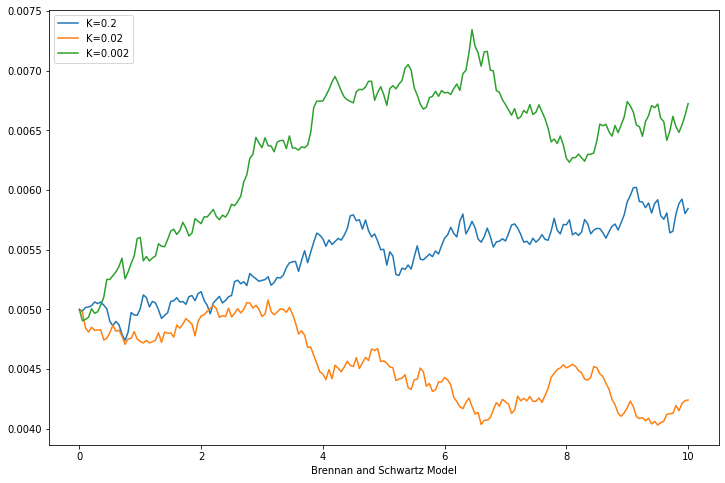

In [257]:
fig = plt.figure(figsize=(12,8))
r0 = 0.005
theta = 0.006
sigma = 0.05
T = 10
N = 200

for kappa in [0.2, 0.02, 0.002]:
    t, rates = brennan_schwartz_model(r0, kappa, theta, sigma, T=T,N=N)
    plt.plot(t,rates,label=f"K={kappa}")
plt.legend(loc='upper left')
plt.xlabel('Brennan and Schwartz Model')
    

In [258]:

# we will simulate 1000 r(t) interest rate process
NUM_OF_SIMULATIONS = 1000

# there are the number of points in a single r(t) process
NUM_OF_POINTS = 200
  m
def monte_carlo_brennan_schwartz(x, r0, kappa, theta, sigma, T=1.):
    
    # calculate the time increment    
    dt = T / float(NUM_OF_POINTS)
    
    # create list data structure to store simulations, store the interest rate
    result = []    
    """
    [
        [ 0.2, 0.21, .... ],
        [ 0.3, 0.31, .... ],
        [ 0.4, 0.41, .... ]
    ]
    """
    
    for i in range(NUM_OF_SIMULATIONS):
        rates = [r0]
        
        for j in range(NUM_OF_POINTS):            
           
            dr = kappa * (theta - rates[-1])*dt + sigma * rates[-1] * np.sqrt(dt) * np.random.normal()
            rates.append(rates[-1] + dr)
            
        result.append(rates)
        
    simulation_data = pd.DataFrame(result)
    
    
    # calculate the integral of the r(t) based on the simulated paths
    integral_sum = simulation_data.sum() * dt
    present_integral_sum = np.exp(-integral_sum)
    
    # mean beacasuse the integral is the average
    bond_price = x * np.mean(present_integral_sum)
    
    
    
    return simulation_data, round(bond_price,2)

Text(0.5, 0, 'Time Period In Days (365 Days)')

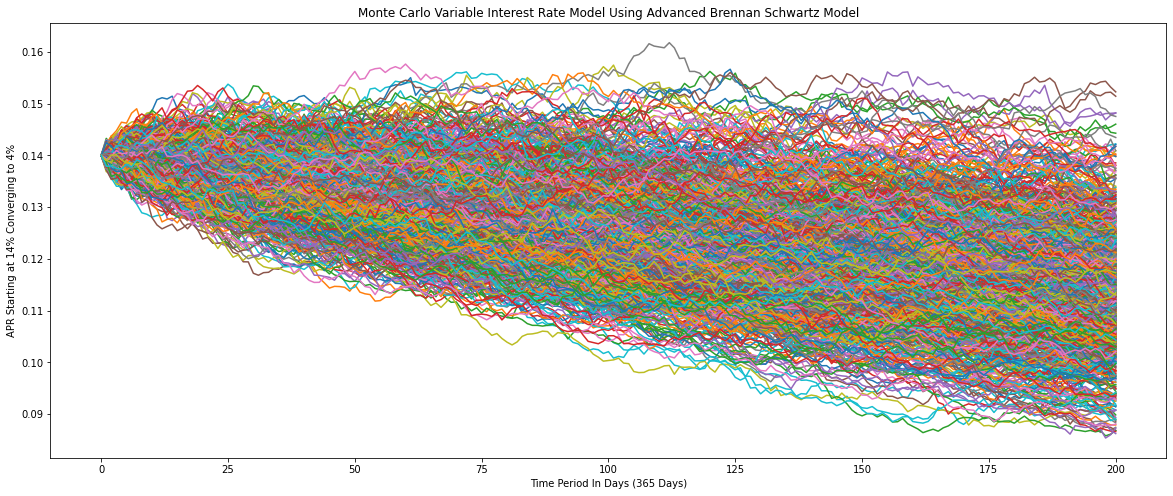

In [260]:
principal_amount_usd = 1000000
initial_interest_rate = 0.1400
velocity_of_interest_rate_change = 0.3
long_term_mean_interest_rate = 0.04
volatility_in_the_system = 0.1

sd, bond_price = monte_carlo_brennan_schwartz(principal_amount_usd, initial_interest_rate, velocity_of_interest_rate_change, long_term_mean_interest_rate,volatility_in_the_system)
ax = sd.T.plot(figsize=(20,8), legend=False,title='Monte Carlo Variable Interest Rate Model Using Advanced Brennan Schwartz Model')
ax.set_ylabel("APR Starting at 14% Converging to 4%")
ax.set_xlabel("Time Period In Days (365 Days)")